In [1]:
import matplotlib.pyplot as plt                  ### fig:robot_header
import math                          #2-4行目を追加
import matplotlib.patches as patches
import numpy as np

In [2]:
class World:
    def __init__(self):
        self.objects = []             # ここにロボットなどのオブジェクトを登録
        
    def append(self,obj):             # オブジェクトを登録するための関数
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(8,8))                # 8x8 inchの図を準備
        ax = fig.add_subplot(111)                      # サブプロットを準備
        ax.set_aspect('equal')                         # 縦横比を座標の値と一致させる
        ax.set_xlim(-5,5)                              # X軸を-5m x 5mの範囲で描画
        ax.set_ylim(-5,5)                              # Y軸も同様に
        ax.set_xlabel("X",fontsize=20)                 # X軸にラベルを表示
        ax.set_ylabel("Y",fontsize=20)                 # 同じくY軸に
        
        for obj in self.objects: obj.draw(ax)           # appendした物体を次々に描画
            
        plt.show()

In [30]:
class IdealRobot:                                        # fig:idealrobot
    def __init__(self, pose, color="black"):
        self.pose = pose        # 引数から姿勢の初期値を設定
        self.r = 0.2            # これは描画のためなので固定値
        self.color = color      # 引数から描画するときの色を設定
        
    def draw(self, ax):
        x, y, theta = self.pose                   # 姿勢の変数を分解して3つの変数へ
        xn = x + self.r * math.cos(theta)         #  ロボットの鼻先のx座標 
        yn = y + self.r * math.sin(theta)         #  ロボットの鼻先のy座標 
        ax.plot([x,xn], [y,yn], color=self.color) # ロボットの向きを示す線分の描画
        #c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color) 
        
        ###ここから変更###
        width = self.r*3
        height = self.r*2
        sqrt = math.sqrt(pow(width/2,2)+pow(height/2,2))#四角形の中点までの長さ
        ini_ang = math.atan(height/width)
        ang = ini_ang + theta      
        x_bias = sqrt*math.cos(ang)
        y_bias = sqrt*math.sin(ang)
        
        wheel_w = width/3
        wheel_h = height/3
        wheel_sqrt = math.sqrt(pow(wheel_w/2,2)+pow(wheel_h/2,2))
        wheel_robot_bias = height/2+wheel_h/2#wheelとロボットの距離
        x_bias_wheel = wheel_sqrt*math.cos(ang)
        y_bias_wheel = wheel_sqrt*math.sin(ang)
        x_bias_wheel_R = wheel_robot_bias*math.cos(theta-math.pi/2)
        y_bias_wheel_R = wheel_robot_bias*math.sin(theta-math.pi/2)
        x_bias_wheel_L = wheel_robot_bias*math.cos(theta+math.pi/2)
        y_bias_wheel_L = wheel_robot_bias*math.sin(theta+math.pi/2)        
            
        
        r = patches.Rectangle(xy=(x-x_bias, y-y_bias),angle = theta/math.pi*180, width=width, height=height, ec='#000000', fill=False)
        r_r = patches.Rectangle(xy=(x-x_bias_wheel+x_bias_wheel_R, y-y_bias_wheel+y_bias_wheel_R),angle = theta/math.pi*180, width=wheel_w, height=wheel_h, ec='#000000', fill=False)
        r_l = patches.Rectangle(xy=(x-x_bias_wheel+x_bias_wheel_L, y-y_bias_wheel+y_bias_wheel_L),angle = theta/math.pi*180, width=wheel_w, height=wheel_h, ec='#000000', fill=False)
        ###ここまで###
        
        ax.add_patch(r)   # 上のpatches.Circleでロボットの胴体を示す円を作ってサブプロットへ登録
        ax.add_patch(r_r)
        ax.add_patch(r_l)

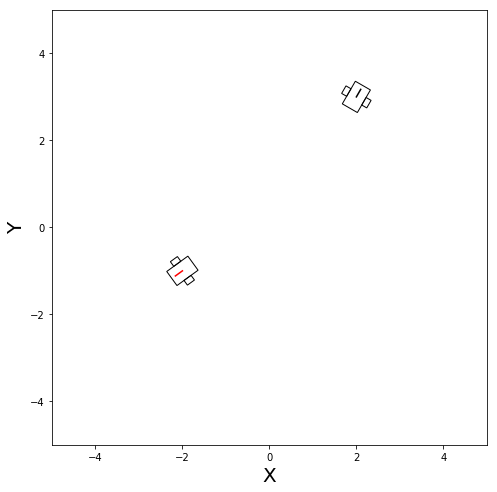

In [31]:
world = World()            ### fig:execution_robot_class
# world.draw()         # これは削除
### 以下追加 ###
robot1 = IdealRobot( np.array([2, 3, math.pi/3]).T )           # ロボットのインスタンス生成（色を省略）
robot2 = IdealRobot( np.array([-2, -1, math.pi/5*6]).T, "red")  # ロボットのインスタンス生成（色を指定）
world.append(robot1)                                      # ロボットを登録 
world.append(robot2)
world.draw()